# Assignment 3

#### 1. Generate a figure from the given dataset that resembles Figure 1.

In [34]:
import pandas as pd

df = pd.read_csv("spiral-dataset.csv", delimiter='\t',header=None,names=['x','y','Class'])
df.head()

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [41]:
class_1_df = df.loc[df['Class'] == 1]
class_2_df = df.loc[df['Class'] == 2]
class_3_df = df.loc[df['Class'] == 3]
class_3_df

,x,y,Class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
101,21.85,15.25,3
102,21.75,15.15,3
103,21.65,15.05,3
104,21.55,15.00,3


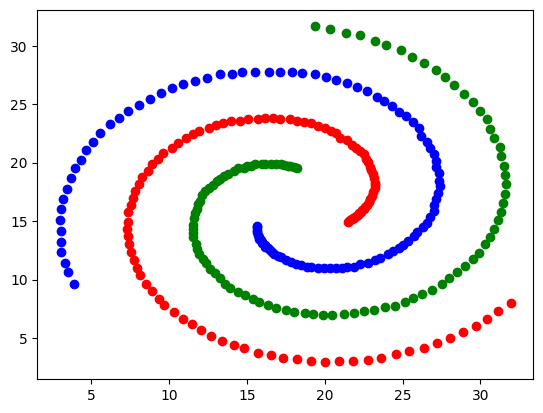

In [48]:
import matplotlib.pyplot as plt

plt.scatter(class_1_df['x'], class_1_df['y'], color='g')
plt.scatter(class_2_df['x'], class_2_df['y'], color='b')
plt.scatter(class_3_df['x'], class_3_df['y'], color='r')
plt.show()


### 2. Implement the k-means clustering algorithm. And do the following:
2a) 
- Run your k-means algorithm on the given dataset setting the value k=3 (because
    visually we only have 3 clusters to worry about). And do not forget to randomly initialize the 3 centroids.
    
2b) 
- Once your k-means algorithm has converged above, stop and from your clustering result compute the intrinsic performance metric: Sum of Squared Error, SSE (smaller the better), and the extrinsic performance metric: Rand-Index, RI (higher the better).
- 2c) 
    Repeat Task (2.a) & (2.b) another 9 (nine) times randomizing again the initial centroids, and report out of the 10 runs of k-means what is the best SSE & RI you could get.
- 2d) 
    Please draw the clustering results (like Figure 1).

In [74]:
import random
import numpy as np 

def df_to_list():
    return list(df.drop(columns=['Class']).values)

def choose_centroids(data, k):
    # choose random centroids
    return random.sample(data, k)  

def assign_clusters(data,centroids):
    k = len(centroids)
    clusters = {}

    for i in range(k):
        clusters[i] = []

    for point in data: 
        euclid_distance = []
        for i in range(k):
            euclid_distance.append(np.linalg.norm(np.array(point) - np.array(centroids[i])))
        clusters[euclid_distance.index(min(euclid_distance))].append(point)

    return clusters

def recalculate_centroids(clusters, centroids, k ):
    for i in range(k):
        centroids[i] = np.mean(clusters[i],axis=0)
    return centroids

for i in range(300):
    data = df_to_list()
    centroids = choose_centroids(data,3)
    clusters = assign_clusters(data, centroids)
    solution = recalculate_centroids(clusters, centroids, 3)
print(centroids)
print(clusters)

[array([13.88710937, 11.13632813]), array([24.34      , 22.35578947]), array([18.57865169, 17.41910112])]
{0: [array([28.05,  5.  ]), array([27.2 ,  4.55]), array([26.35,  4.15]), array([25.4 ,  3.85]), array([24.6,  3.6]), array([23.6,  3.3]), array([22.75,  3.15]), array([21.85,  3.05]), array([20.9,  3. ]), array([20. ,  2.9]), array([19.1,  3. ]), array([18.2,  3.2]), array([17.3 ,  3.25]), array([16.55,  3.5 ]), array([15.7,  3.7]), array([14.85,  4.1 ]), array([14.15,  4.4 ]), array([13.4 ,  4.75]), array([12.7,  5.2]), array([12.05,  5.65]), array([11.45,  6.15]), array([10.9 ,  6.65]), array([10.3 ,  7.25]), array([9.7 , 7.85]), array([9.35, 8.35]), array([8.9 , 9.05]), array([8.55, 9.65]), array([ 8.15, 10.35]), array([ 7.95, 10.95]), array([ 7.75, 11.7 ]), array([ 7.55, 12.35]), array([ 7.45, 13.  ]), array([ 7.35, 13.75]), array([ 7.3 , 14.35]), array([ 7.35, 14.95]), array([ 7.35, 15.75]), array([ 7.55, 16.35]), array([ 7.7 , 16.95]), array([ 7.8 , 17.55]), array([ 8.05, 18

In [61]:
centroids[0]

np.float64(25.445038167938932)

In [62]:
float(centroids[0])

25.445038167938932

In [72]:
float(centroids[1])

10.543362831858408

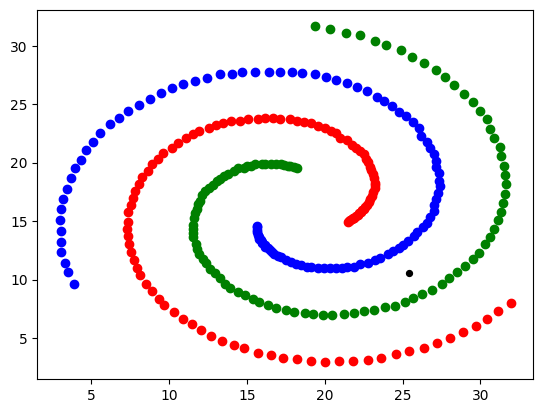

In [71]:
plt.scatter(class_1_df['x'], class_1_df['y'], color='g')
plt.scatter(class_2_df['x'], class_2_df['y'], color='b')
plt.scatter(class_3_df['x'], class_3_df['y'], color='r')
plt.scatter(float(centroids[0]), float(centroids[1]), float(centroids[2]), color='black')
plt.show()
